In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

# 1. Order of Magnitude Question #4 Calculations

In [6]:
def tf(M=None, Mtot=None, vc=None, ri=None):
    """Dynamical friction time
    
    Parameters
    ----------
    
    M : float
       mass of satellite (solar masses)
    
    Mtot : float
       mass of host (solar masses)
    
    vc : float
       circular velocity of host (km / s)
    
    ri : float
       initial radius (kpc)
       
"""
    ll = np.log(Mtot / M)
    x = (2.6e11 / ll) * (ri / 2.)**2 * (vc / 250.) * (1e+6 / M)
    return(x)

In [13]:
def tf_alt(M=None, Mtot=None, ri=None):
    """Dynamical friction time (alternate version)
    
    Parameters
    ----------
    
    M : float
       mass of satellite (solar masses)
    
    Mtot : float
       mass of host (solar masses)
    
    ri : float
       initial radius (kpc)
       
"""
    ll = np.log(Mtot / M)
    x = (1.5e11 / ll) * (ri / 2.)**1.5 * (Mtot / 1e+10)**0.5 * (1e+6 / M)
    return(x)

The "tf"-based answers use guesses for the velocity dispersion and therefore circular velocity.

In [24]:
# (a) in billions of years
print(tf(M=1e12, Mtot=1e15, vc=np.sqrt(2.) * 1000., ri=500) / 1.e+9)

13.307344838046468


In [25]:
# (b) in billions of years
print(tf(M=1e11, Mtot=1e12, vc=np.sqrt(2.) * 150., ri=50) / 1.e+9)

0.598830517712091


In [26]:
# (c) in billions of years
print(tf(M=1e5, Mtot=1e12, vc=np.sqrt(2.) * 150., ri=10.) / 1.e+9)

3421.8886726405203


The "tf_alt"-based answers assume that the circular velocity is constant and assume most of the mass of the system is interior to the starting point.

In [29]:
print(tf_alt(M=1e12, Mtot=1e15, ri=500) / 1.e+9)
print(tf_alt(M=1e11, Mtot=1e12, ri=50) / 1.e+9)
print(tf_alt(M=1e5, Mtot=1e12, ri=10) / 1.e+9)

27.14340511895324
0.8143021535685971
10404.771254879177


# 2. Lowered Isothermal Model

*Author: Rakshitha Thaman (mostly)*

The lowered isothermal model is:

$$f(E) = \rho_1 \left(2 \pi \sigma^2\right)^{-3/2} \left(\exp\left(-E/\sigma^2\right) - 1\right)$$

for $E<0$ and $f(E)=0$ otherwise.

Let us first integrate this to get the density $\rho$ and (assuming spherical symmetry) the radial equation for the potential $\Phi(r)$.

Assuming constant mass particles, we can treat the mass as unity and use the equation of energy:

$$E = \Phi(r) + \frac{1}{2} v^2$$

Then we can integrate over velocity. At each radius $r$ the integral only extends to $E=0$ or $v=\sqrt{-2\Phi(r)}$:

$$\rho = \int_0^\sqrt{-2\Phi} {\rm d}^3v f(x, v) 
= \int_0^\sqrt{-2\Phi} {\rm d}^3v \rho_1 \left(2\pi \sigma^2\right)^{-3/2} \left(\exp\left(-E/\sigma^2\right) - 1\right)$$

$$\rho 
= \rho_1 \left(2\pi \sigma^2\right)^{-3/2} \left[\exp\left(-\Phi(r)/\sigma^2\right) \int_0^\sqrt{-2\Phi} {\rm d}^3v  \exp\left(-v^2/2 \sigma^2\right) - \int_0^\sqrt{-2\Phi} {\rm d}^3v \right]$$

The integral in the first term in square brackets becomes:

$$I_1 = \int_0^{\sqrt{-2\Phi}} 4\pi v^2 {\rm d}v \exp\left(-v^2/2\sigma^2\right)$$

and setting $a= \sqrt{-\Phi/\sigma^2}$ and $x=v/\sqrt{2}\sigma$:

$$I_1 = 4\pi 2^{3/2} \sigma^3 \int_0^a x^2 {\rm d}x \exp\left(-x^2\right)$$

Integration by parts yields:

$$I_1 = 4\pi 2^{3/2} \sigma^3 \left( \frac{\sqrt{\pi}}{4} {\rm erf} a - \frac{a}{2} \exp\left(-a^2\right)\right)$$


$$I_1 = 4\pi 2^{3/2} \sigma^3 \left( \frac{\sqrt{\pi}}{4} {\rm erf} \sqrt{-\frac{\Phi}{\sigma^2}} - \frac{1}{2} \sqrt{-\frac{\Phi}{\sigma^2}} \exp\left(\frac{\Phi}{\sigma^2}\right)\right)$$


The second term in square brackets is:

$$I_2 = \left. \frac{4\pi}{3} v^3 \right|_0^{\sqrt{-2\Phi}} = \frac{4\pi}{3} \left(-2\Phi\right)^{3/2}$$

Putting this together we find:

$$\rho = \rho_1 \left(2\pi \sigma^2\right)^{-3/2} \left[\exp\left(-\Phi(r)/\sigma^2\right) I_1 - I_2\right]$$

$$\rho = \rho_1 \left(2\pi \sigma^2\right)^{-3/2} \left[ 4\pi 2^{3/2} \sigma^3 \left( \frac{\sqrt{\pi}}{4} \exp\left(-\frac{\Phi}{\sigma^2}\right) {\rm erf} \sqrt{-\frac{\Phi}{\sigma^2}} - \frac{1}{2} \sqrt{-\frac{\Phi}{\sigma^2}} \right) - \frac{4\pi}{3} \left(-2\Phi\right)^{3/2}\right]$$

$$\rho = \rho_1 \left[ \frac{4}{\sqrt{\pi}} \left(\frac{\sqrt{\pi}}{4} \exp\left(-\frac{\Phi}{\sigma^2}\right) {\rm erf} \sqrt{-\frac{\Phi}{\sigma^2}} - \frac{1}{2} \sqrt{-\frac{\Phi}{\sigma^2}} \right) - \frac{1}{3} \sqrt{\frac{2}{\pi}} \left(-\frac{2\Phi}{\sigma^2}\right)^{3/2}\right] 
$$

$$\rho = \rho_1 \left[ \exp\left(-\frac{\Phi}{\sigma^2}\right) {\rm erf} \sqrt{-\frac{\Phi}{\sigma^2}} 
- \frac{2}{\sqrt{\pi}} \sqrt{-\frac{\Phi}{\sigma^2}} - \frac{1}{3} \sqrt{\frac{2}{\pi}} \left(-\frac{2\Phi}{\sigma^2}\right)^{3/2}\right] 
$$

$$\rho = \rho_1 \left[ \exp\left(-\frac{\Phi}{\sigma^2}\right) {\rm erf} \sqrt{-\frac{\Phi}{\sigma^2}} 
    - \sqrt{- \frac{4\Phi}{\pi \sigma^2}} \left(1 - \frac{2\Phi}{3\sigma^2}\right) \right] 
$$

Which thank the lord matches Binney & Tremaine Equation 4.111! (With the replacement $\Psi = - \Phi$).

Now Poisson's equation says:

$$\nabla^2 \Phi = 4\pi G \rho$$

so we can now write now an equation just in terms of $\Phi$!

$$ \frac{1}{r^2} \frac{{\rm d}}{{\rm d}r} \left(r^2 \frac{{\rm d}\Phi}{{\rm d}r}\right) = 4 \pi G \rho(\Phi)$$

Now we define $y = \Phi /\sigma^2$, and we get:

$$ \frac{1}{r^2} \frac{{\rm d}}{{\rm d}r} \left(r^2 \frac{{\rm d}y}{{\rm d}r}\right) = \frac{4 \pi G}{\sigma^2} \rho(y)$$

This can be solved as a system of first-order equations, with the definition $x_0 = y$ and $x_1 = {\rm d}y/{\rm d}r$. The equation for $x_1$ can be found:

$$\frac{{\rm d}}{{\rm d}r}\left(r^2 x_1\right) = \frac{4\pi G}{\sigma^2} r^2 \rho(x_0)$$

$$2 r x_1 + r^2 \frac{{\rm d}^2\, x_1}{{\rm d}r^2} = \frac{4\pi G}{\sigma^2} r^2 \rho(x_0) $$

$$\frac{{\rm d}^2\, x_1}{{\rm d}r^2} = - \frac{2 x_1}{r} + \frac{4\pi G }{\sigma^2} \rho(x_0) $$

Putting all these equations together for convenience:

$$x_0 = \Phi/\sigma^2$$

$$\rho(x_0) = \rho_1 \left[\exp(- x_0) {\rm erf}(\sqrt{-x_0}) - \sqrt{-\frac{4x_0}{\pi}} \left(1 - \frac{2x_0}{3}\right)\right]$$

$$\frac{{\rm d}x_0}{{\rm d}r} = x_1$$

$$\frac{{\rm d}^2\, x_1}{{\rm d}r^2} = - \frac{2 x_1}{r} + \frac{4\pi G }{\sigma^2} \rho(x_0) $$

We are told to use initial conditions where $x_0(r=0)= -n$, where $n=3$, $6$, and $12$. This sets the central density $\rho_0 = \rho(x_0)$ through the formula above. We will plot things in units of the King radius defined as:

$$r_0 = \sqrt{\frac{9\sigma^2}{4\pi G \rho_0}}$$

We will set $\rho_1 = 1$ and $\sigma = 1$ for convenience. Now we are ready to perform the calculation.

In [4]:
rho_1 = 1.
sigma = 1.
G = 6.67e-11

In [13]:
def rho_function(x0):
    rhov = rho_1 * (np.exp(- x0) * sp.special.erf(np.sqrt(- x0)) - np.sqrt(- 4 * x0 / np.pi) * (1 - 2*x0/3))
    return(rhov)

In [14]:
def derivatives(x, r):
    """Returns derivatives defined above"""
    return [x[1],
            -2 / r * x[1] + 4 * np.pi * G * rho_1 / sigma**2 * rho_function(x[0])]

In [15]:
rho = np.zeros((3,10000))
phi = np.zeros((3,10000))
r_grid = np.zeros((3,10000))
j = 0
r_0 = np.zeros(3)
for i in [-3,-6,-12]:
    phi_0 = i * sigma**2
    rho_0 = rho_function(phi_0 / sigma**2)
    r_0[j] = np.sqrt(9 * sigma**2 / (4 * np.pi * G * rho_0))
    r_grid[j] = np.linspace(0.0001, 500*r_0[j], 10000)
    y, y_prime = sp.integrate.odeint(derivatives, [i, 0], r_grid[j]).T
    phi[j] = y / sigma**2
    rho[j] = rho_function(phi[j] / sigma**2)
    j += 1

<ipython-input-13-626eeccce21e>:2: RuntimeWarning: invalid value encountered in sqrt
  rhov = rho_1 * (np.exp(- x0) * sp.special.erf(np.sqrt(- x0)) - np.sqrt(- 4 * x0 / np.pi) * (1 - 2*x0/3))


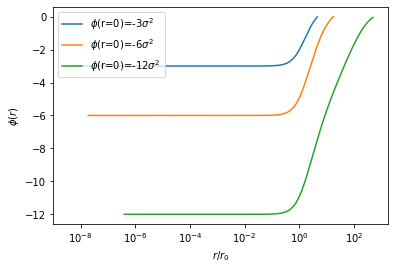

In [16]:
plt.plot(r_grid[0]/r_0[0],phi[0],label=r'$\phi$(r=0)=-3$\sigma^2$')
plt.plot(r_grid[1]/r_0[1],phi[1],label=r'$\phi$(r=0)=-6$\sigma^2$')
plt.plot(r_grid[2]/r_0[2],phi[2],label=r'$\phi$(r=0)=-12$\sigma^2$')
plt.xscale('log')
plt.xlabel(r'$r/r_0$')
plt.ylabel(r'$\phi(r)$')
plt.legend()

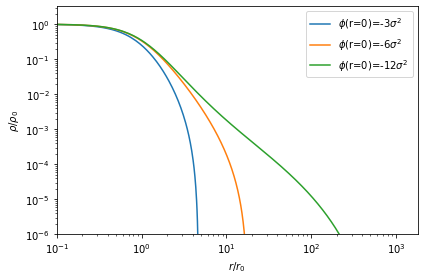

In [18]:
plt.loglog(r_grid[0]/r_0[0],rho[0]/rho[0,0],label=r'$\phi$(r=0)=-3$\sigma^2$')
plt.loglog(r_grid[1]/r_0[1],rho[1]/rho[1,0],label=r'$\phi$(r=0)=-6$\sigma^2$')
plt.loglog(r_grid[2]/r_0[2],rho[2]/rho[2,0],label=r'$\phi$(r=0)=-12$\sigma^2$')
plt.xlim(0.1,)
plt.ylim(1e-6,)
plt.ylabel(r'$\rho/\rho_0$')
plt.legend()
plt.xlabel(r'$r/r_0$')
plt.tight_layout()